In [198]:
#importing dependencies
import requests #request html file of link
from bs4 import BeautifulSoup #html parser to get the data that we need
import numpy as np #vector operations
import pandas as pd #label data
import matplotlib.pyplot as plt #visualize data
from sklearn.linear_model import LinearRegression #process data
import pickle #to use save and reuse model
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [35]:
baseSearch = "https://www.kijiji.ca/b-cars-vehicles/canada/equinox/page-"
baseSearch2 = "/k0c27l0?ad=offering&price=3500__"

In [36]:
#getting links from kijiji search
ads = []
descrips = []
#loop through 16 pages
for i in range(99):
    
    #find all divs in the page
    r = requests.get(baseSearch+str(i+1)+baseSearch2)
    soup = BeautifulSoup(r.content)
    listOfDivs = soup.find_all("div")

    #searches for divs with correct attributes then save the link
    for div in listOfDivs:
        if div.has_attr("data-vip-url"):
            des = div.find_all("div", {"class", "description"})[0].text.split("\n")
            des = [var for var in des if var][0].lstrip()[:-4]
            link = div["data-vip-url"]
            ads.append("https://www.kijiji.ca" + link + "?null&siteLocale=en_CA")
            descrips.append(des)
    print(i)

/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


In [51]:
#
raw_data = []
errorLog = []
numAds = len(ads)
#saves all the pages
i = 1
for i, ad in enumerate(ads):
    r = requests.get(ad)
    soup = BeautifulSoup(r.content)
    try:
        price = soup.find_all("span", {"class": "currentPrice-3369960085"})[0].text
    except:
        print("%d Partial price Error" % i)
        try:
            price = soup.find_all("span", {"data-reactid": "39"})[0]["value"]
        except:
            try:
                price = soup.find_all("span", {"data-reactid": "40"})[0]["value"]
            except:
                try:
                    price = soup.find_all("span", {"data-reactid": "42"})[0]["value"]
                except:
                    print("%d price bug" %i)
                    errorLog.append(i)
                    continue
                pass
            pass
        pass
    
    try:
        s_data_label = soup.find_all("p", {"class": "attributeLabel-2129198691"}, text=True)
        s_data = soup.find_all("h4", {"class": "attributeValue-936465483"})
        if len(s_data) != len(s_data_label):
            print("data and label doesn't match")
        else:
            for j in range(len(s_data)):
                s_data[j] = s_data[j].text
                s_data_label[j] = s_data_label[j].text
    except:
        print("%d data bug" %i)
        errorLog.append(i)
        pass
    
    #find title
    try:
        title = soup.find_all("h1", {"class": "title-1093844370"})[0].text
    except:
        print("%d title bug" %i)
        errorLog.append(i)
        pass
    raw_data.append([price, ad, title, [s_data_label, s_data]])
    print("%d of %d" %(i, numAds))
    i+=1

/anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


0 of 2475
1 of 2475
2 of 2475
3 of 2475
4 of 2475
5 of 2475
6 of 2475
7 of 2475
8 of 2475
9 of 2475
10 of 2475
11 of 2475
12 of 2475
13 of 2475
14 of 2475
15 of 2475
16 of 2475
17 of 2475
18 of 2475
19 of 2475
20 of 2475
21 of 2475
22 of 2475
23 of 2475
24 of 2475
25 of 2475
26 of 2475
27 of 2475
28 of 2475
29 of 2475
30 of 2475
31 of 2475
32 of 2475
33 of 2475
34 of 2475
35 of 2475
36 of 2475
37 of 2475
38 of 2475
39 of 2475
40 of 2475
41 of 2475
42 of 2475
43 of 2475
44 of 2475
45 of 2475
46 of 2475
47 of 2475
48 of 2475
49 of 2475
50 of 2475
51 of 2475
52 of 2475
53 of 2475
54 of 2475
55 of 2475
56 of 2475
57 of 2475
58 of 2475
59 of 2475
60 of 2475
61 of 2475
62 of 2475
63 of 2475
64 of 2475
65 of 2475
66 of 2475
67 of 2475
68 of 2475
69 of 2475
70 of 2475
71 of 2475
72 of 2475
73 of 2475
74 of 2475
75 of 2475
76 of 2475
77 of 2475
78 of 2475
79 of 2475
80 of 2475
81 of 2475
82 of 2475
83 of 2475
84 of 2475
85 of 2475
86 of 2475
87 of 2475
88 of 2475
89 of 2475
90 of 2475
91 of 247

686 of 2475
687 of 2475
688 of 2475
689 of 2475
690 of 2475
691 of 2475
692 of 2475
693 of 2475
694 of 2475
695 of 2475
696 of 2475
697 of 2475
698 of 2475
699 of 2475
700 of 2475
701 of 2475
702 of 2475
703 of 2475
704 of 2475
705 of 2475
706 of 2475
707 of 2475
708 of 2475
709 of 2475
710 of 2475
711 of 2475
712 of 2475
713 of 2475
714 of 2475
715 of 2475
716 of 2475
717 of 2475
718 of 2475
719 of 2475
720 of 2475
721 of 2475
722 of 2475
723 of 2475
724 of 2475
725 of 2475
726 of 2475
727 of 2475
728 of 2475
729 of 2475
730 of 2475
731 of 2475
732 of 2475
733 of 2475
734 of 2475
735 of 2475
736 of 2475
737 of 2475
738 of 2475
739 of 2475
740 of 2475
741 of 2475
742 of 2475
743 of 2475
744 of 2475
745 of 2475
746 of 2475
747 of 2475
748 of 2475
749 of 2475
750 of 2475
751 of 2475
752 of 2475
753 of 2475
754 of 2475
755 of 2475
756 of 2475
757 of 2475
758 of 2475
759 of 2475
760 of 2475
761 of 2475
762 of 2475
763 of 2475
764 of 2475
765 of 2475
766 of 2475
767 of 2475
768 of 2475
769 

1341 of 2475
1342 of 2475
1343 of 2475
1344 of 2475
1345 of 2475
1346 of 2475
1347 of 2475
1348 of 2475
1349 of 2475
1350 of 2475
1351 of 2475
1352 of 2475
1353 of 2475
1354 of 2475
1355 of 2475
1356 of 2475
1357 of 2475
1358 of 2475
1359 of 2475
1360 of 2475
1361 of 2475
1362 of 2475
1363 of 2475
1364 of 2475
1365 of 2475
1366 of 2475
1367 of 2475
1368 of 2475
1369 of 2475
1370 Partial price Error
1370 price bug
1371 of 2475
1372 of 2475
1373 of 2475
1374 of 2475
1375 of 2475
1376 of 2475
1377 of 2475
1378 of 2475
1379 of 2475
1380 of 2475
1381 of 2475
1382 of 2475
1383 of 2475
1384 of 2475
1385 of 2475
1386 of 2475
1387 of 2475
1388 of 2475
1389 of 2475
1390 of 2475
1391 of 2475
1392 of 2475
1393 of 2475
1394 of 2475
1395 of 2475
1396 of 2475
1397 of 2475
1398 of 2475
1399 of 2475
1400 of 2475
1401 of 2475
1402 of 2475
1403 of 2475
1404 of 2475
1405 of 2475
1406 of 2475
1407 of 2475
1408 of 2475
1409 of 2475
1410 of 2475
1411 of 2475
1412 of 2475
1413 of 2475
1414 of 2475
1415 of 247

1970 of 2475
1971 of 2475
1972 of 2475
1973 of 2475
1974 of 2475
1975 of 2475
1976 of 2475
1977 of 2475
1978 of 2475
1979 of 2475
1980 of 2475
1981 of 2475
1982 of 2475
1983 of 2475
1984 of 2475
1985 of 2475
1986 of 2475
1987 of 2475
1988 of 2475
1989 of 2475
1990 of 2475
1991 of 2475
1992 of 2475
1993 of 2475
1994 of 2475
1995 of 2475
1996 of 2475
1997 of 2475
1998 of 2475
1999 of 2475
2000 of 2475
2001 of 2475
2002 of 2475
2003 of 2475
2004 of 2475
2005 of 2475
2006 of 2475
2007 of 2475
2008 of 2475
2009 of 2475
2010 of 2475
2011 of 2475
2012 of 2475
2013 of 2475
2014 of 2475
2015 of 2475
2016 of 2475
2017 of 2475
2018 of 2475
2019 of 2475
2020 of 2475
2021 of 2475
2022 of 2475
2023 of 2475
2024 of 2475
2025 of 2475
2026 of 2475
2027 of 2475
2028 of 2475
2029 of 2475
2030 of 2475
2031 of 2475
2032 of 2475
2033 of 2475
2034 of 2475
2035 of 2475
2036 of 2475
2037 of 2475
2038 of 2475
2039 of 2475
2040 of 2475
2041 of 2475
2042 of 2475
2043 of 2475
2044 of 2475
2045 of 2475
2046 of 2475

In [7]:
el = [1,2,5,6,4]
for index in sorted(el,reverse=True):
    print(index)

6
5
4
2
1


In [67]:
with open("raw_data.pkl", "wb") as output_file:
    pickle.dump(raw_data, output_file)

In [95]:
#opening data
afile = open(r'data.pkl', 'wb')
pickle.dump(raw_data, afile)
afile.close()

In [77]:
#removing duplicate ads
raw_data_copy = raw_data
listDup = []
for i in range(len(raw_data_copy)):
    for j in range(len(raw_data_copy)):
        if i != j:
            if raw_data_copy[i][1] == raw_data[j][1]:
                listDup.append(i)
print(len(raw_data))
print(len(list(set(listDup))))

2469
593


In [157]:
prices = np.zeros((len(raw_data),1))

for i in range(len(raw_data)):
    try:
        prices[i,0] = int(int("".join([s for s in raw_data[i][0] if s.isdigit()]))/int(100))
    except:
        errorIndex.append(i)
        print(raw_data[i][0] + str(i))

Please Contact2468


In [159]:

kilometer = np.zeros((len(raw_data), 1))
for i in range(len(raw_data)):

    try:
        kilometer[i,0]=int("".join([s for s in raw_data[i][3][1][-1] if s.isdigit()]))
    except:
        errorIndex.append(i)

In [167]:
listTrim = []
for i in range(len(raw_data)):
    lenAttr = len(raw_data[i][3][0])
    appended = False
    for j in range(lenAttr):
        if raw_data[i][3][0][j] == "Trim":
            listTrim.append(raw_data[i][3][1][j])
            appended = True
    if appended != True:
        listTrim.append("NaN")

In [176]:
data = []
listTrim = []
error = []
#things that we want in DF
attributes = ["Trim", "Year", "Colour", "Drivetrain"]

#loop through attripbutes
for k in range(len(attributes)):
    #list of that specfic attribute
    list = []
    errorCache = []
    #loop through data
    for i in range(len(raw_data)):
        #length of description
        lenAttr = len(raw_data[i][3][0])
        appended = False
        #loop thru description
        for j in range(lenAttr):
            #if description is what we are looking for
            if raw_data[i][3][0][j] == attributes[k]:
                #list append data
                list.append(raw_data[i][3][1][j])
                appended = True
        if appended != True:
            errorCache.append(i)
            list.append("NaN")
    data.append(list)
    error.append(errorCache)

In [196]:
year = np.zeros((len(data[1]), 1))
for i in range(len(data[1])):
    try:
        year[i,0] = int(data[1][i])
    except:
        year[i,0] = np.NaN

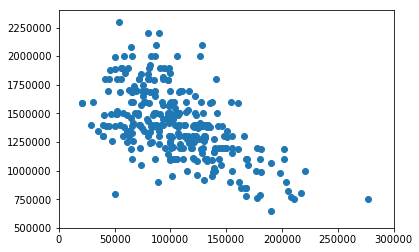

In [154]:
plt.scatter(X, y)
axes = plt.gca()
axes.set_xlim([0,300000])
axes.set_ylim([500000,2400000])
plt.show()


In [138]:
import unidecode
X[1] = unidecode.unidecode(X[1])
X[1] = X[1].replace(" ", "")
int(X[1])

190000

In [159]:
index = ["price", 'Year', 'Kilometers']
table = []
for page in raw_data:
    row = [int(int(page[0])/100)]

    for item in page[1]:
        indice = item.find_all("p")[0].text
        if indice == 'Year':
            row.append(2018 - int(item.find_all("h4")[0].text))
        elif indice in index:
            row.append(item.find_all("h4")[0].text)
    table.append(row)

In [163]:
listPop = []
for i in range(len(table)):
    if len(table[i]) < 3:
        listPop.append(i)
listPop

table = [i for j, i in enumerate(table) if j not in listPop]

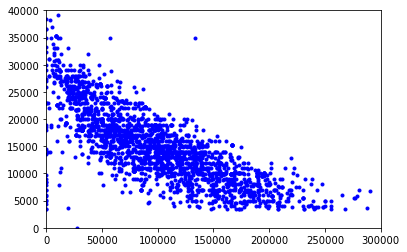

In [175]:

plt.plot(kilometer,prices, 'b.')
plt.axis([0, 300000, 0, 40000])
plt.show()